In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

def calculate_metrics(true_values, pred_values):
    mse = round(mean_squared_error(true_values, pred_values),3)
    mae = round(mean_absolute_error(true_values, pred_values),3)
    r_score = round(r2_score(true_values, pred_values),3)

    return {"mse": mse,
            "mae": mae,
            "r_score": r_score,}

In [2]:
import pandas as pd
import os
import sys
sys.path.insert(0, r'C:\work\DrugDiscovery\main_git\XAI_Chem')

from ml_part.random_forest.data_prep.preparation import DataPreparation
from train import RFTrain

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

CSV_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\remained_features.csv'
smiles_filepath = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\smiles_to_index.pkl'

dataPreparation = DataPreparation(CSV_PATH)

X, y = dataPreparation.prepare_data_for_RF(is_pKa=False,
                                           use_mandatory_features=True,
                                           is_remove_outliers=True)

rf_train = RFTrain(X=X, 
                   y=y,
                   smiles_filepath=smiles_filepath)


Mor30 [68, 77, 81, 83, 85]
Mor29 [69, 85]
Mor03 [52, 54, 127, 182]
Mor14 [1, 32, 58, 70, 79, 130]
PNSA5 [37, 38]
Mor07 [76]
Mor32 [14]
PBF [40, 71, 127]
Mor28 [79]
Mor09 [ 79 164]
Mor22 [1, 154]
FPSA3 [40]
mol_volume [127]
Mor18 [79]
Mor16 [54]
Mor27 [68]
Mor11 [60]
Mor26 [37]
Mor06 [74, 76, 79, 82]
Mor15 [1, 15, 32, 58, 73, 79, 151, 153]
Mor21 [76]
Mor25 [58]
f_atom_fraction [124]
Mor12 [75]
Mor13 [75]
Mor19 [34, 70, 79]
linear_distance [88, 89, 123, 126, 127, 140]
logP [82, 83]
Remains rows:139, amount of features: 84


In [3]:
best_hyperparams = rf_train.find_best_params_with_hyperopt()

model = rf_train.train(max_depth=best_hyperparams['max_depth'], 
                       max_features=best_hyperparams['max_features'], 
                       min_samples_leaf=best_hyperparams['min_samples_leaf'], 
                       min_samples_split=best_hyperparams['min_samples_split'], 
                       n_estimators=best_hyperparams['n_estimators'])


100%|██████████| 200/200 [05:48<00:00,  1.74s/trial, best loss: 0.1874842259454762]
Найкращі гіперпараметри: {'max_depth': 14, 'max_features': 135, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 1445}
Mean Squared Error: 0.07896956220618513


In [5]:
model = rf_train.train(max_depth=best_hyperparams['max_depth'], 
                       max_features=best_hyperparams['max_features'], 
                       min_samples_leaf=best_hyperparams['min_samples_leaf'], 
                       min_samples_split=best_hyperparams['min_samples_split'], 
                       n_estimators=best_hyperparams['n_estimators'])

Mean Squared Error: 0.07896956220618513


In [6]:
y_test = rf_train.y_test
X_test = rf_train.X_test
y_pred = model.predict(X_test)

calculate_metrics(y_test, y_pred)

{'mse': 0.079, 'mae': 0.211, 'r_score': 0.735}

<BarContainer object of 82 artists>

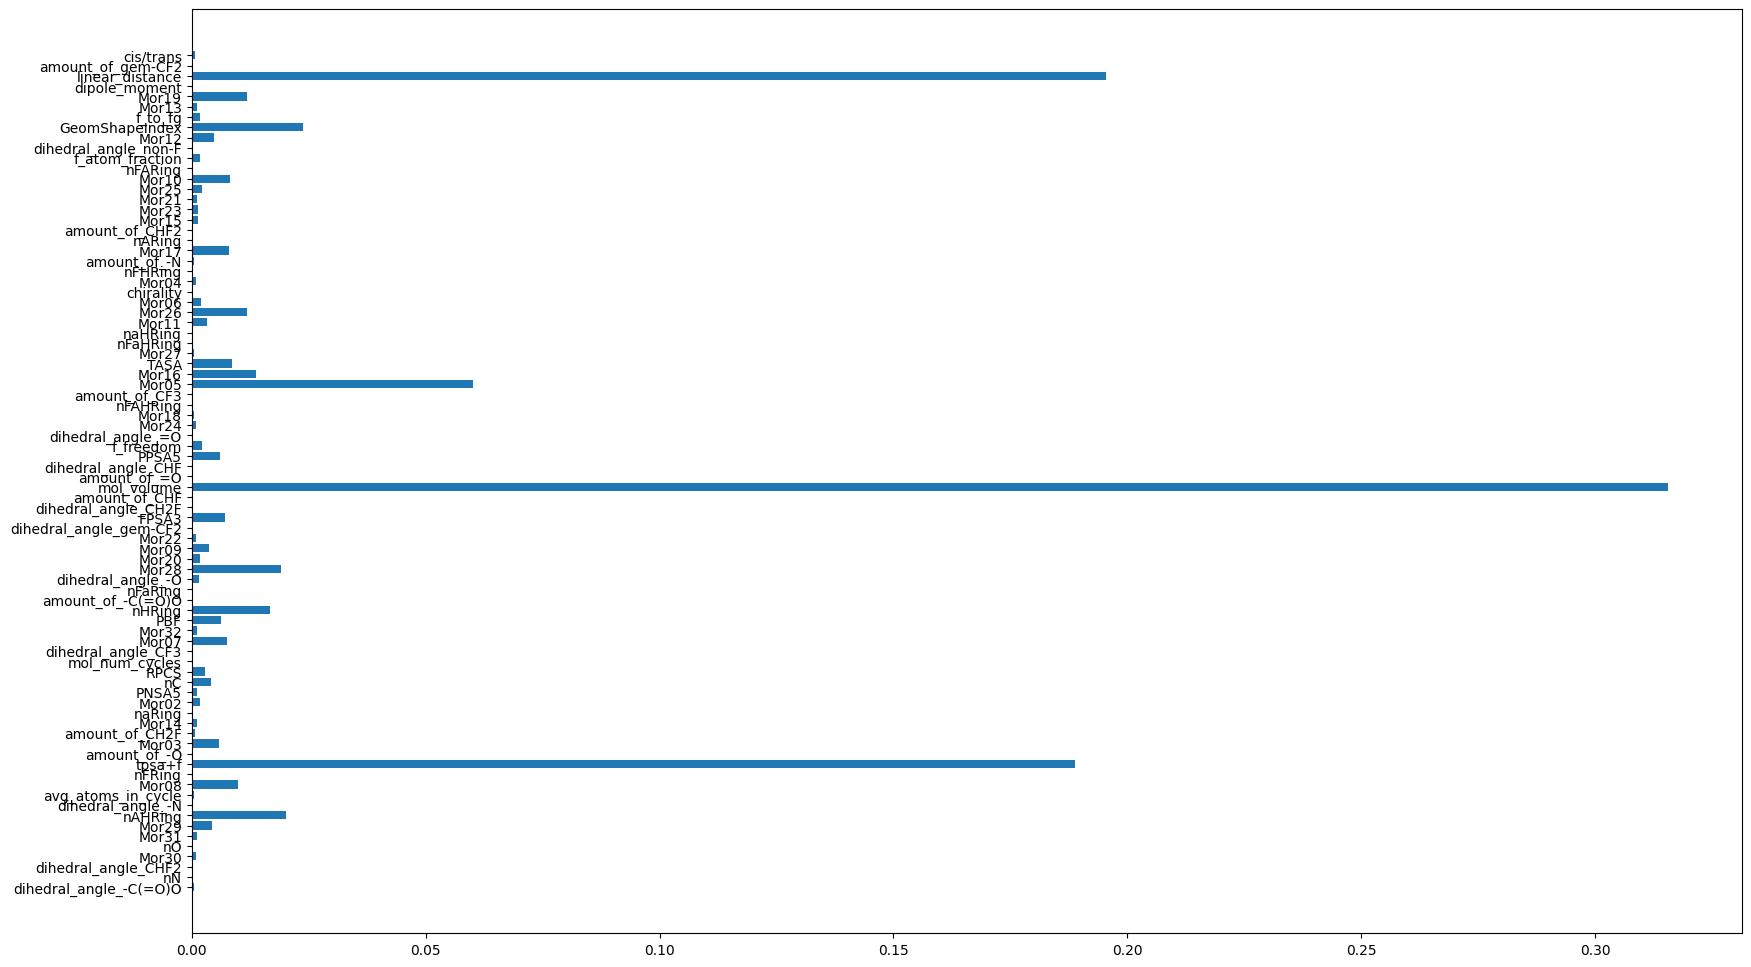

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.barh(X.columns, model.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

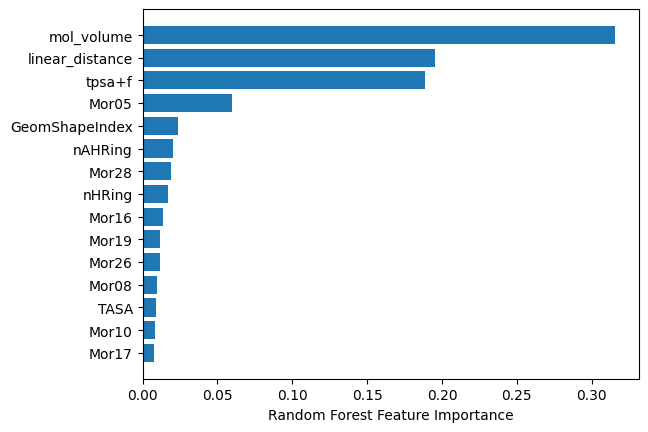

In [8]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][::-1][:15][::-1], model.feature_importances_[sorted_idx][::-1][:15][::-1])
plt.xlabel("Random Forest Feature Importance")

feature permutation

Text(0.5, 0, 'Permutation Importance')

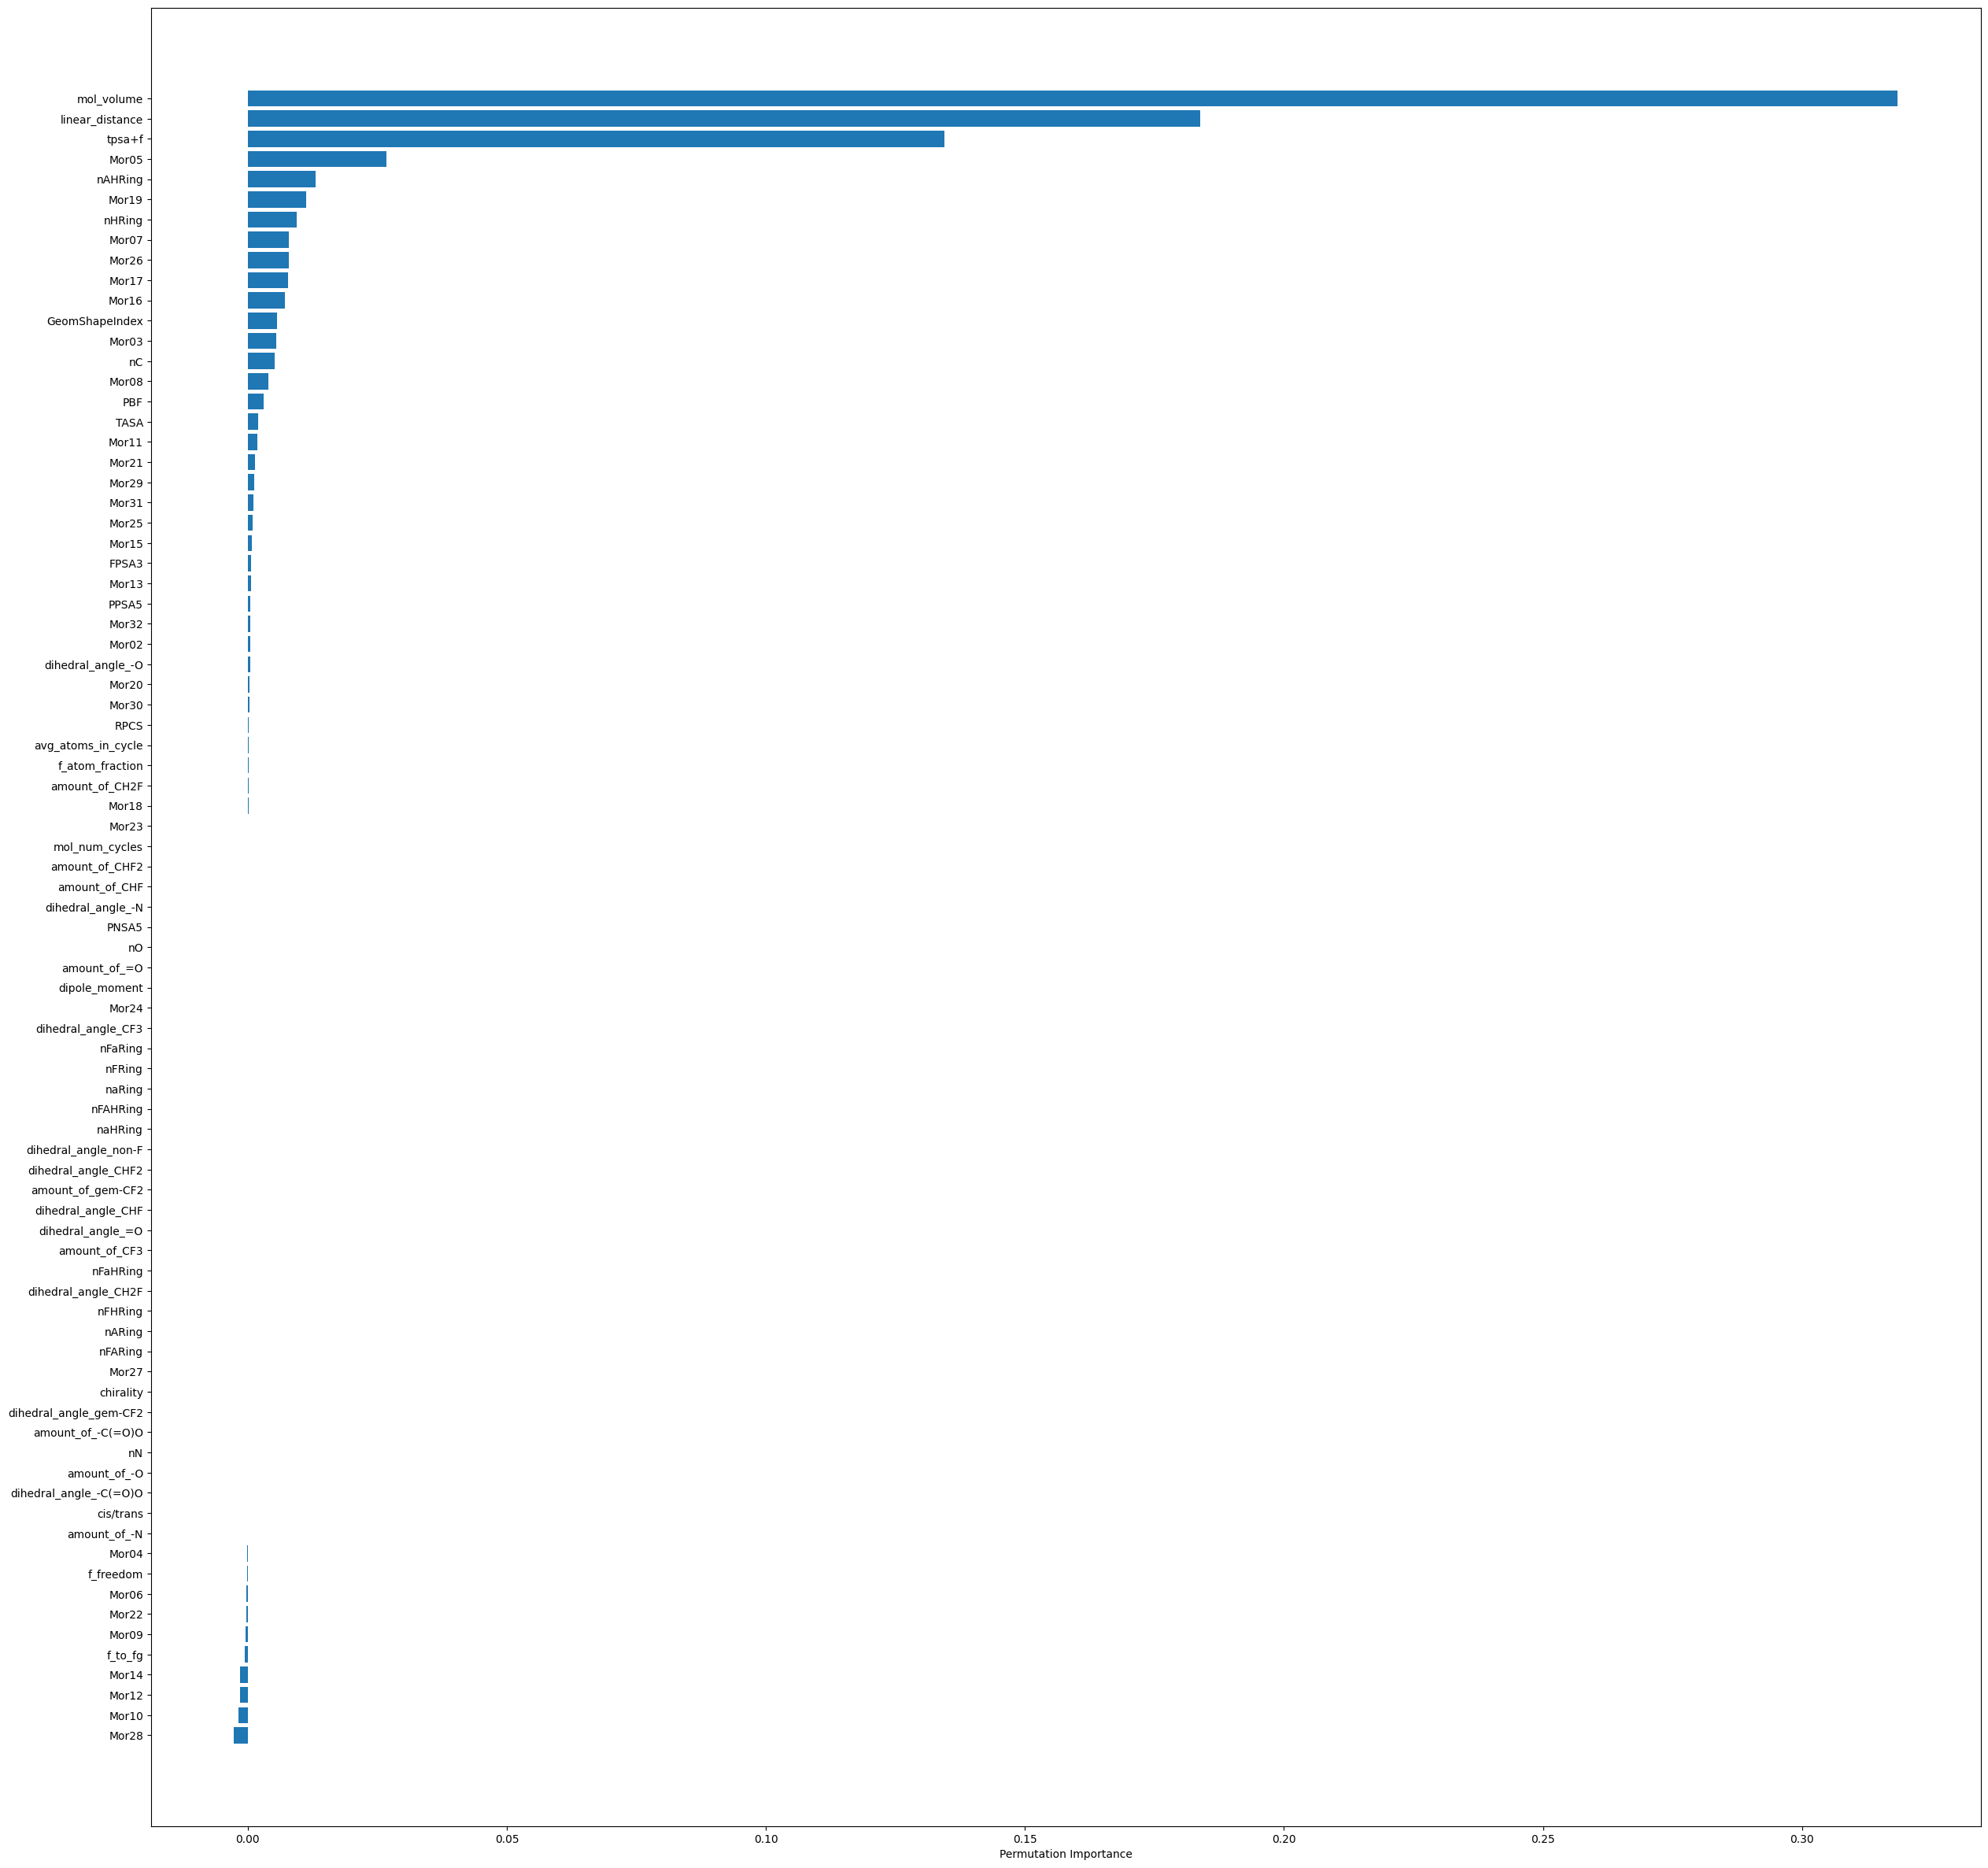

In [9]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(30,30))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

**SHAP**

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


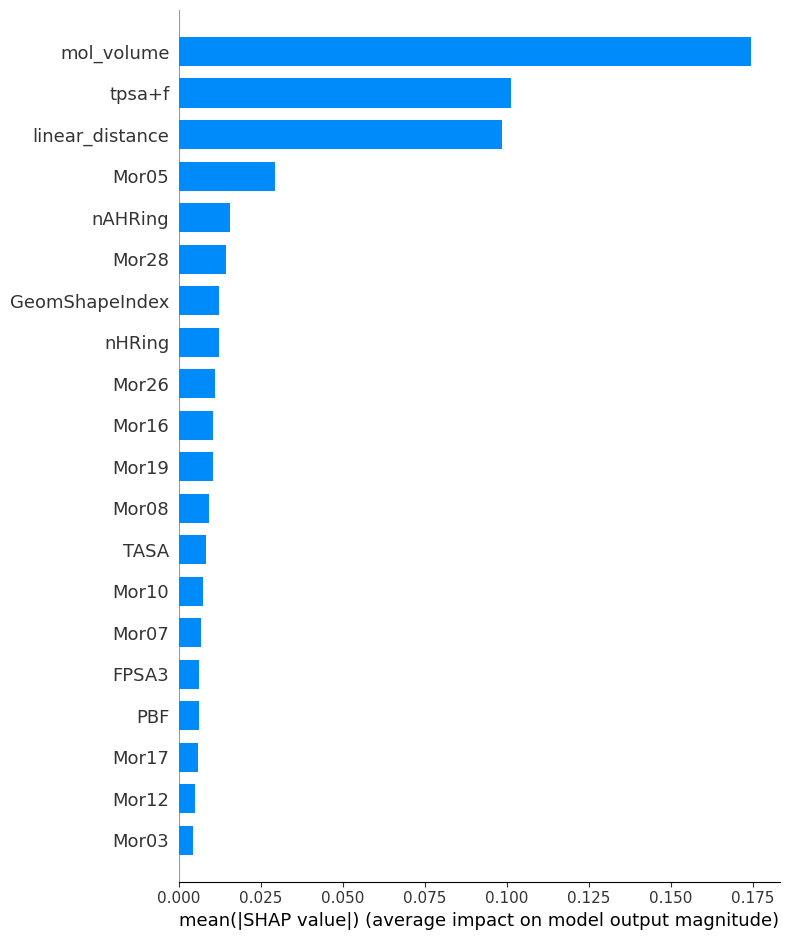

In [10]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


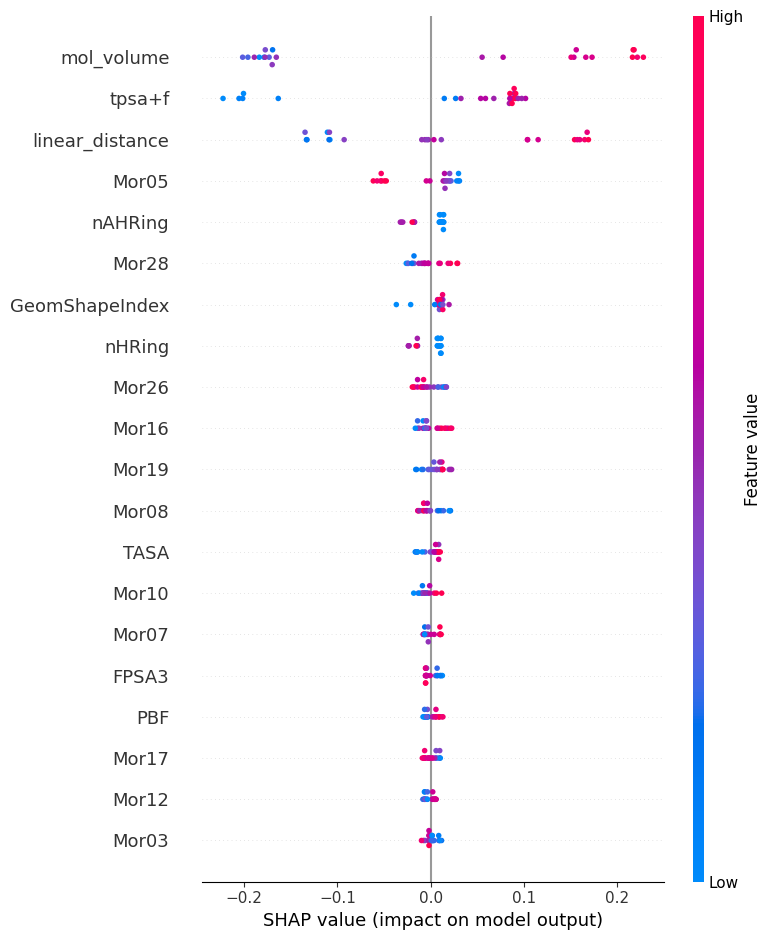

In [11]:
shap.summary_plot(shap_values, X_test)

In [15]:
type(y_pred)

numpy.ndarray

In [20]:
for index, y_test_index in enumerate(y_test.index):
    print(y_test.loc[y_test_index], y_pred[index])

2.26 2.2971172617777835
2.42 2.4013501318811215
2.26 2.1682981859579766
2.69 2.5658905116363
2.93 2.5715702599606067
2.72 2.5716950374740675
2.53 2.472181430396125
1.29 1.7261940630851886
2.03 1.8861795135446706
1.95 1.8511948512023548
2.5 2.518192652785778
2.21 2.173181506515925
2.04 1.9340469818517996
1.56 1.7808042952604848
3.26 2.403925970566838
2.23 1.852022733460236
1.08 1.2749376118771554
1.75 1.5810248903512585
1.73 2.000744558539978
1.7 2.0663217511479726
1.65 1.3632443400172827
1.47 1.3605157247998771
1.37 1.7025371091234718
